# Using dictionary as Graph

In [ ]:
# importing networkx
import networkx as nx
import numpy as np
# importing matplotlib.pyplot
import matplotlib.pyplot as plt

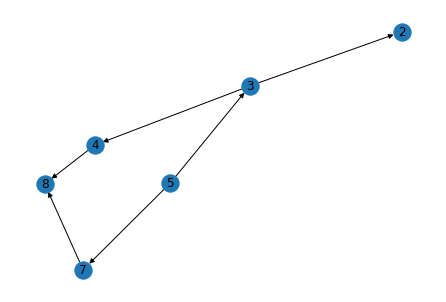

In [ ]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

g = nx.DiGraph(graph)
nx.draw(g,with_labels=True)
plt.show()

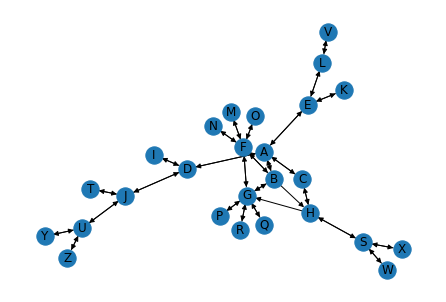

In [ ]:
graph = {
        'A': ['B', 'C', 'D', 'E'],
        'B': ['A', 'F', 'G', 'H'],
        'C': ['A', 'H'],
        'D': ['A', 'I', 'J'],
        'E': ['A', 'K', 'L'],
        'F': ['B', 'G', 'M', 'N', 'O'],
        'G': ['B', 'F', 'P', 'Q', 'R'],
        'H': ['C', 'G', 'S'],
        'I': ['D'],
        'J': ['D', 'T', 'U'],
        'K': ['E'],
        'L': ['E', 'V'],
        'M': ['F'],
        'N': ['F'],
        'O': ['F'],
        'P': ['G'],
        'Q': ['G'],
        'R': ['G'],
        'S': ['H', 'W', 'X'],
        'T': ['J'],
        'U': ['J', 'Y', 'Z'],
        'V': ['L'],
        'W': ['S'],
        'X': ['S'],
        'Y': ['U'],
        'Z': ['U']
    }

g = nx.DiGraph(graph)
nx.draw(g,with_labels=True)


{('C', 'D'): Text(3.5, 2.5, '7'),
 ('B', 'C'): Text(3.5, 1.5, '8'),
 ('E', 'F'): Text(0.5, 2.5, '3'),
 ('F', 'A'): Text(0.5, 1.5, '7'),
 ('A', 'B'): Text(2.0, 1.0, '6'),
 ('D', 'E'): Text(2.0, 3.0, '6')}

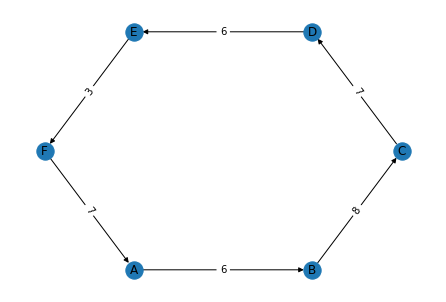

In [ ]:
V = {'A','B','C','D','E','F'}
E = [('A','B',6),('B','C',8),('C','D',7),('D','E',6),('E','F',3),('F','A',7)]

pos = {
    'A':[1,1],'B':[3,1],'C':[4,2],'D':[3,3],'E':[1,3],'F':[0,2]
}

G = nx.DiGraph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

#G.nodes
#G.edges

weights = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos=pos,with_labels=True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=weights)\

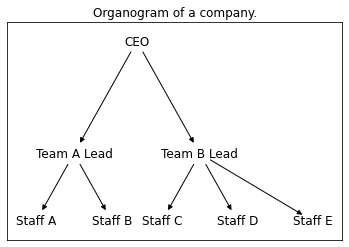

In [ ]:
G = nx.DiGraph()
nodes = np.arange(0, 8).tolist()
G.add_nodes_from(nodes)
G.add_edges_from([(0,1), (0,2),
 (1,3), (1, 4),
 (2, 5), (2, 6), (2,7)])

pos = {0:(10, 10),
 1:(7.5, 7.5), 2:(12.5, 7.5),
 3:(6, 6), 4:(9, 6),
 5:(11, 6), 6:(14, 6), 7:(17, 6)}
labels = {0:"CEO",
 1:"Team A Lead", 2: "Team B Lead",
 3: "Staff A", 4: "Staff B",
 5: "Staff C", 6: "Staff D", 7: "Staff E"}
nx.draw_networkx(G, pos = pos, labels = labels, arrows = True,
 node_shape = "s", node_color = "white")
plt.title("Organogram of a company.")

plt.show()

## Exercise

Update the following code and add weight in the graph:

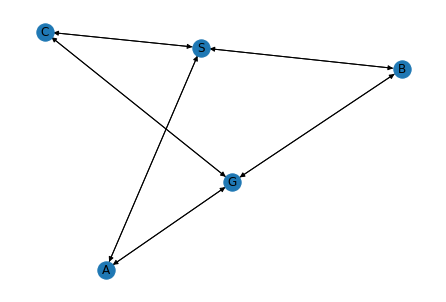

In [ ]:
ucs_test_graph = {
         'S': ['A', 'B', 'C'],
         'A': ['S', 'G'],
         'B': ['S', 'G'],
         'C': ['S', 'G'],
         'G': ['A', 'B', 'C']
    }


ucs_test_weight = {
         ('S', 'A'): 1,
         ('S', 'B'): 5,
         ('S', 'C'): 15,

         ('A', 'G'): 10,
         ('A', 'S'): 1,

         ('B', 'S'): 5,
         ('B', 'G'): 5,

         ('C', 'S'): 15,
         ('C', 'G'): 5,

         ('G', 'A'): 10,
         ('G', 'B'): 5,
         ('G', 'C'): 5,
    }

V = {'S','A','B','C','G'}
E = [('S','A',1),('S','B',5),('S','C',15),('A','G',10),('A','S',1),('B','S',5),('B','G',5),('C','S',15),('C','G',5),('G','A',10),('G','B',5),('G','C',5)]
pos = {
    'S':[2,1],'A':[1,0],'B':[1,1],'C':[1,2],'G':[0,1]}



g = nx.DiGraph(ucs_test_graph)
nx.draw(g,with_labels=True)



# Uninformed search: BFS, DFS and UCS

In [ ]:
from queue import Queue, PriorityQueue


def bfs(graph, start, end):
    """
    Compute DFS(Depth First Search) for a graph
    :param graph: The given graph
    :param start: Node to start BFS
    :param end: Goal-node
    """
    frontier = Queue()
    frontier.put(start)
    explored = []

    while True:
        if frontier.empty():
            raise Exception("No way Exception")
        current_node = frontier.get()
        explored.append(current_node)

        # Check if node is goal-node
        if current_node == end:
            print(explored)
            return

        for node in graph[current_node]:
            if node not in explored:
                frontier.put(node)


def dfs(graph, start, end):
    """
    Compute dfs for a graph
    :param graph: The given graph
    :param start: Node to start bfs
    :param end: Goal-node
    """
    frontier = [start, ]
    explored = []

    while True:
        if len(frontier) == 0:
            raise Exception("No way Exception")
        current_node = frontier.pop()
        explored.append(current_node)

        # Check if node is goal-node. print path and return
        if current_node == end:
            print(explored)
            return

        # expanding nodes
        for node in reversed(graph[current_node]):
            #print(node)
            if node not in explored:
                frontier.append(node)


def ucs_weight(from_node, to_node, weights=None):
    """
    Returns the UCS weight for a edge between from and to
    Assumption: There is no edge with weight >= 10e100 (You can change it)
    :param from_node: The node edge starts from
    :param to_node: The node edge ends to
    :param weights: Dictionary of weights; maps `(from, to) -> weight`
    :return: Returns the weight of edge between from and to.
    """
    return weights.get((from_node, to_node), 10e100) if weights else 1


def ucs(graph, start, end, weights=None):
    """
    Function to compute UCS(Uniform Cost Search) for a graph
    :param graph: The graph to compute UCS for
    :param start: start node
    :param end: end node
    :param weights: A dictionary of weights; maps (start_node, end_node) -> weight
    """
    frontier = PriorityQueue()
    frontier.put((0, start))  # (priority, node)
    explored = []

    while True:
        if frontier.empty():
            raise Exception("No way Exception")

        ucs_w, current_node = frontier.get()

        explored.append(current_node)


        if current_node == end:
            print(explored)
            return

        for node in graph[current_node]:
            if node not in explored:
                frontier.put((
                    ucs_w + ucs_weight(current_node, node, weights),
                    node
                ))


In [ ]:
if __name__ == "__main__":
    # This is Tree

    first_graph = {
        'A': ['B', 'C', 'D', 'E'],
        'B': ['A', 'F', 'G'],
        'C': ['A', 'H'],
        'D': ['A', 'I', 'J'],
        'E': ['A', 'K', 'L'],
        'F': ['B', 'M', 'N', 'O'],
        'G': ['B', 'P', 'Q', 'R'],
        'H': ['C', 'S'],
        'I': ['D'],
        'J': ['D', 'T', 'U'],
        'K': ['E'],
        'L': ['E', 'V'],
        'M': ['F'],
        'N': ['F'],
        'O': ['F'],
        'P': ['G'],
        'Q': ['G'],
        'R': ['G'],
        'S': ['H', 'W', 'X'],
        'T': ['J'],
        'U': ['J', 'Y', 'Z'],
        'V': ['L'],
        'W': ['S'],
        'X': ['S'],
        'Y': ['U'],
        'Z': ['U']
    }

    print("BFS:")
    bfs(first_graph, 'A', 'Y')
    print("DFS:")
    dfs(first_graph, 'A', 'Y')
    print("UCS:")
    ucs(first_graph, 'A', 'Y')

    ucs_test_graph = {
         'S': ['A', 'B', 'C'],
         'A': ['S', 'G'],
         'B': ['S', 'G'],
         'C': ['S', 'G'],
         'G': ['A', 'B', 'C']
    }

    ucs_test_weight = {
         ('S', 'A'): 1,
         ('S', 'B'): 5,
         ('S', 'C'): 15,

         ('A', 'G'): 10,
         ('A', 'S'): 1,

         ('B', 'S'): 5,
         ('B', 'G'): 5,

         ('C', 'S'): 15,
         ('C', 'G'): 5,

         ('G', 'A'): 10,
         ('G', 'B'): 5,
         ('G', 'C'): 5,
    }
    print("UCS with weighted graph:")
    ucs(ucs_test_graph, 'S', 'G', ucs_test_weight)


BFS:
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
DFS:
['A', 'B', 'F', 'M', 'N', 'O', 'G', 'P', 'Q', 'R', 'C', 'H', 'S', 'W', 'X', 'D', 'I', 'J', 'T', 'U', 'Y']
UCS:
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
UCS with weighted graph:
['S', 'A', 'B', 'G']


# A* search


*   Step1: Place the starting node in the OPEN list.
*   Step 2: Check if the OPEN list is empty or not, if the list is empty then return failure and stops.
*  Step 3: Select the node from the OPEN list which has the smallest value of evaluation function (g+h), if node n is goal node then return success and stop, otherwise
*  Step 4: Expand node n and generate all of its successors, and put n into the closed list. For each successor n', check whether n' is already in the OPEN or CLOSED list, if not then compute evaluation function for n' and place into Open list.

* Step 5: Else if node n' is already in OPEN and CLOSED, then it should be attached to the back pointer which reflects the lowest g(n') value.

* Step 6: Return to Step 2.


In [ ]:
from collections import deque

class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis

    def get_neighbors(self, v):
        return self.adjac_lis[v]

    # This is heuristic function which is having equal values for all nodes
    def h(self, n):
        H = {
            'A': 0,
            'B': 2,
            'C': 1,
            'D': 1,
            'E': 1
        }

        return H[n]

    def a_star_algorithm(self, start, stop):
        # In this open_lst is a lisy of nodes which have been visited, but who's
        # neighbours haven't all been always inspected, It starts off with the start
  #node
        # And closed_lst is a list of nodes which have been visited
        # and who's neighbors have been always inspected
        open_lst = set([start])
        closed_lst = set([])

        # poo has present distances from start to all other nodes
        # the default value is +infinity
        poo = {}
        poo[start] = 0

        # par contains an adjac mapping of all nodes
        par = {}
        par[start] = start

        while len(open_lst) > 0:
            n = None

            # it will find a node with the lowest value of f() -
            for v in open_lst:
                if n == None or poo[v] + self.h(v) < poo[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop
            # then we start again from start
            if n == stop:
                reconst_path = []

                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]

                reconst_path.append(start)

                reconst_path.reverse()

                #print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all the neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
              # if the current node is not presentin both open_lst and closed_lst
                # add it to open_lst and note n as it's par
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update par data and poo data
                # and if the node was in the closed_lst, move it to open_lst
                else:
                    if poo[m] > poo[n] + weight:
                        poo[m] = poo[n] + weight
                        par[m] = n

                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)

            # remove n from the open_lst, and add it to closed_lst
            # because all of his neighbors were inspected
            open_lst.remove(n)
            closed_lst.add(n)

        print('Path does not exist!')
        return None

['A', 'C', 'D', 'E']

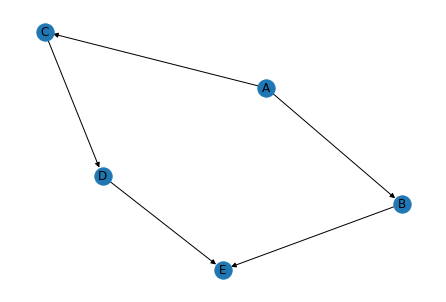

In [ ]:
graph = {
    'A': ['B','C'],
    'B': ['E'],
    'C': ['D'],
    'D': ['E'],
    'E': []
}

g = nx.DiGraph(graph)
nx.draw(g,with_labels=True)


adjac_lis = {
    'A': [('B', 2), ('C', 1)],
    'B': [('E', 1)],
    'C': [('D', 1)],
    'D': [('E', 1)],
    'E': []
}

graph1 = Graph(adjac_lis)
graph1.a_star_algorithm('A', 'E')

## Path finder

In [ ]:
#################################
## Describes the rectangle map ##
## - S - Start point           ##
## - E - End point             ##
## - # - Wall                  ##
#################################
MAP = [
    ".............",
    "..#..........",
    "..#...#......",
    "..#.E.#......",
    "..#####......",
    "S............",
]

In [ ]:
### Describes model of Map

class SquareGrid:

    def __init__(self, string_map):
        self.string_map = string_map
        self.end_position = None
        self.start_position = None
        self.walls = []
        self.height = len(string_map)
        self.width  = len(string_map[0])

        ## Validate input
        for i in range(0, self.height):
            if(len(string_map[i]) != self.width):
                 raise Exception("Map does not have correct size")
            for j in range(0, self.width):
                if(string_map[i][j] == "#"):
                    self.walls.append((i, j))
                if(string_map[i][j] == "S"):
                    self.start_position = (i, j)
                if(string_map[i][j] == "E"):
                    self.end_position = (i, j)
        if(self.end_position == None or self.start_position == None):
            raise Exception("Map does not have 'Start' or 'End' Positions")


    def in_bounds(self, id):
        (x, y) = id
        return 0 <= x < self.width and 0 <= y < self.height

    def passable(self, id):
        return id not in self.walls

    def neighbors(self, id):
        (x, y) = id
        results = [(x+1, y), (x, y-1), (x-1, y), (x, y+1)]

        results = filter(self.in_bounds, results)
        results = filter(self.passable, results)
        return results

    def cost(self, current, next):
        return 1


    def get_start_end_positions(self):
        return self.start_position, self.end_position;

    def draw(self, path = []):
        new_map = []
        # Fill empty
        for x in range(self.height):
            new_map.append("." * self.width)

        # Draw Walls
        for x in self.walls:
            (i, j) = x
            row = list(new_map[i])
            row[j] = "#"
            new_map[i] = "".join(row)

        # Draw Path
        for x in path:
            (i, j) = x
            row = list(new_map[i])
            row[j] = "x"
            new_map[i] = "".join(row)

        # Draw Start end End  Point
        (i, j) = self.start_position
        row = list(new_map[i])
        row[j] = "S"
        new_map[i] = "".join(row)

        (i, j) = self.end_position
        row = list(new_map[i])
        row[j] = "E"
        new_map[i] = "".join(row)

        # Draw Map
        for i in new_map:
            print(i)

In [ ]:
### Create a Map and draw it
g = SquareGrid(MAP)
g.draw()

.............
..#..........
..#...#......
..#.E.#......
..#####......
S............


In [ ]:
### Queue with priority
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]

In [ ]:
### Heuristic function for accounting in cost
def heuristic(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2)**2 + (y1 - y2)**2)**.5

In [ ]:
### A Star Search algorithm
def a_star_search(graph, start, goal):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    counter = 0

    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break

        for next in graph.neighbors(current):
            new_cost = cost_so_far[current] + graph.cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(goal, next)
                frontier.put(next, priority)
                came_from[next] = current
                counter += 1

    return came_from, cost_so_far, counter

### Finds the way between points according to dictionary
def build_path(came_from, start, goal):
    result = []
    item = goal
    result.append(item)
    while (item != start):
        item = came_from.get(item)
        if(item == None):
            raise Exception('There is no path')
        result.append(item);

    return result[::-1];

In [ ]:
### Run Search
start, goal = g.get_start_end_positions()
came_from, cost_so_far, counter = a_star_search(g, start, goal)

### Build Path
path = build_path(came_from, start, goal)
path.remove(start)
path.remove(goal)

### See result
print(g.get_start_end_positions())
print(path)

((5, 0), (3, 4))
[(5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4)]


In [ ]:
### Draw Path
g.draw(path)

.xxx.........
.x#x.........
.x#xx.#......
.x#.E.#......
.x#####......
Sx...........
